# **What are Neural Networks ?**

Neural networks are advanced computational models that emulate the human brain's functions. Composed of interconnected neurons, they process and learn from data to perform tasks like pattern recognition and decision-making. Their ability to learn from data is crucial, driving advancements in fields like natural language processing, self-driving cars, and automated decision-making. Neural networks are essential for artificial intelligence, fueling innovation and shaping technology's future.

**Generating Data**

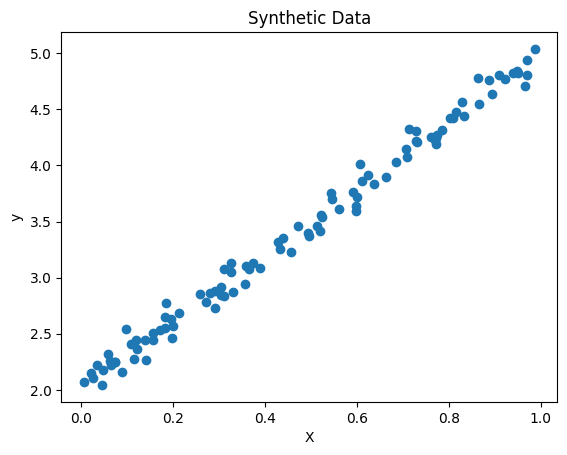

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generating synthetic data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 3 * X.squeeze() + 2 + np.random.randn(100) * 0.1

# Plot the data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.show()


**Network**

In [7]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def relu(self, x):  # ReLU(X)=max(0,X)
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2

    def compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def backward(self, X, y_true, y_pred):
        m = X.shape[0]

        # Output layer gradients
        dL_dz2 = 2 * (y_pred - y_true) / m
        dL_dW2 = np.dot(self.a1.T, dL_dz2)
        dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)

        # Hidden layer gradients
        dL_da1 = np.dot(dL_dz2, self.W2.T)
        dL_dz1 = dL_da1 * self.relu_derivative(self.z1)
        dL_dW1 = np.dot(X.T, dL_dz1)
        dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)

        # Update weights and biases
        self.W1 -= self.learning_rate * dL_dW1
        self.b1 -= self.learning_rate * dL_db1
        self.W2 -= self.learning_rate * dL_dW2
        self.b2 -= self.learning_rate * dL_db2

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = self.compute_loss(y, y_pred)
            self.backward(X, y, y_pred)
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')


**Training**

In [8]:

nn = SimpleNeuralNetwork(input_size=1, hidden_size=10, output_size=1, learning_rate=0.01)
nn.train(X, y.reshape(-1, 1), epochs=1000)


Epoch 0, Loss: 16.06301821249448
Epoch 100, Loss: 0.009129350037088528
Epoch 200, Loss: 0.008128306660119437
Epoch 300, Loss: 0.007993974861938397
Epoch 400, Loss: 0.007975333430412908
Epoch 500, Loss: 0.0079720084890328
Epoch 600, Loss: 0.00797070473088826
Epoch 700, Loss: 0.007969666825221145
Epoch 800, Loss: 0.00796866330772131
Epoch 900, Loss: 0.007967663707544953


**Results**

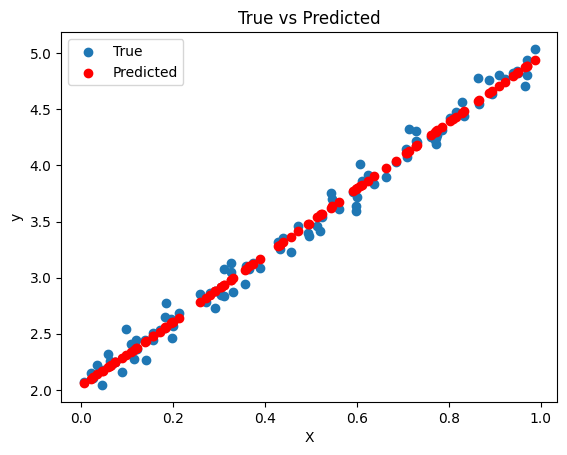

In [9]:
# Predict
y_pred = nn.forward(X)
# Ploting the results
plt.scatter(X, y, label='True')
plt.scatter(X, y_pred, label='Predicted', color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.title('True vs Predicted')
plt.legend()
plt.show()
